In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
M_table= Base.classes.measurement
S_table= Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session= Session(engine)

In [9]:
session.query(M_table).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12a7842f0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

In [10]:
session.query(S_table).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12a784fb0>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'longitude': -157.8168,
 'id': 1}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(M_table.date).order_by(M_table.date.desc()).first()

('2017-08-23',)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

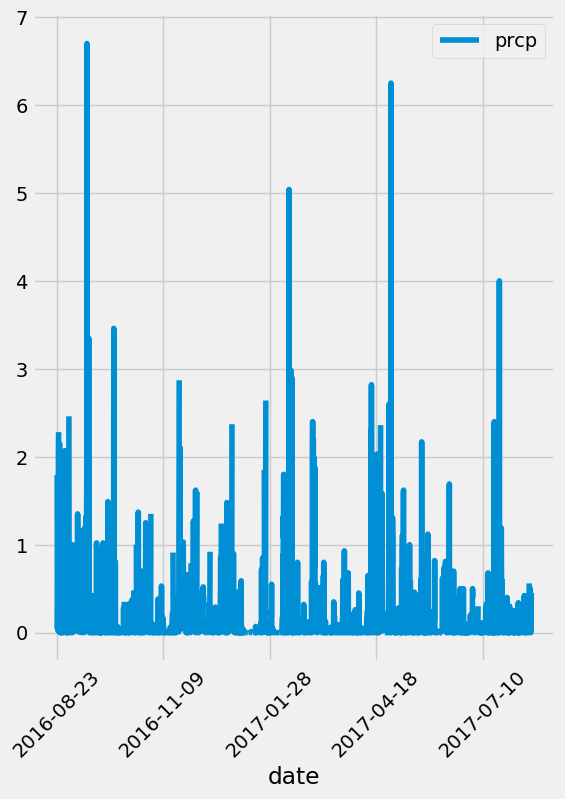

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
 
# Calculate the date one year from the last date in data set.
year_ago= dt.date(2017,8,23)-dt.timedelta(days=365)
year_ago
# Perform a query to retrieve the date and precipitation scores
fdp=session.query(M_table.date,M_table.prcp).filter(M_table.date>=year_ago).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
fdp = pd.DataFrame(fdp).set_index('date')
fdp.head()
# Sort the dataframe by date

fdp.sort_values(by='date',ascending=True,inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
fdp.plot(figsize = (6,8))
plt.xticks(rotation=45)

In [13]:
fdp

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
fdp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(S_table.station).count()
# session.query(M_table.date,M_table.prcp).filter(M_table.date>=year_ago).all()              

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(M_table.station, func.count (M_table.prcp)).group_by(M_table.station).order_by(func.count(M_table.prcp).desc()).all()

# select stations, Count(prcp)
# from mtable
# groupby 'stations'
# order by count(prcp)

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(M_table.tobs),func.max(M_table.tobs),func.avg(M_table.tobs)).filter(M_table.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station=session.query(M_table.tobs).filter(M_table.station=='USC00519281').filter(M_table.date>=year_ago).all()
active_station=pd.DataFrame(active_station)
active_station.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


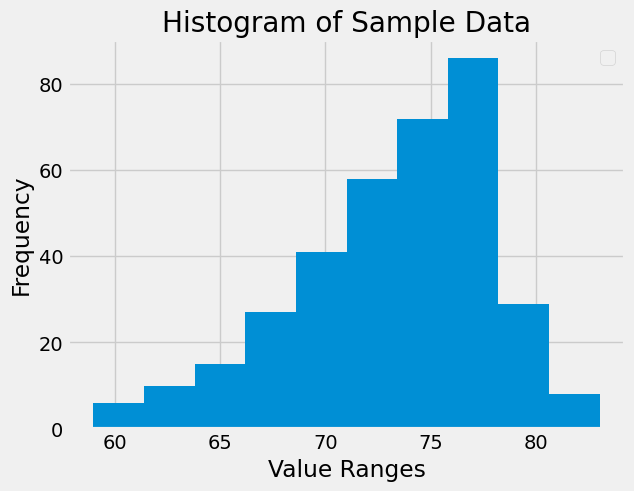

In [19]:
plt.hist(active_station['tobs'])
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Close Session

In [20]:
# Close Session
session.close()